# News Crawling

## 학습 목표

* HTML 문서의 개념에 대해서 이해한다.
* 태그의 형식에 대해서 이해한다.
* 크롤링을 위한 패키지인 BeautifulSoup4의 사용법을 이해한다.
* 머신 러닝 분류 방법인 나이브 베이즈 분류기의 사용법을 익힌다.

## 웹 이해하기 (1) HTML과 태그

* 크롤링(crawling) : 웹 페이지로부터 데이터를 추출하는 행위
* 크롤러(crawler)  : 크롤링하는 소프트웨어
* 웹사이트 : HTML 이라는 마크업 언어로 작성된 문서로 구성되어있습니다.

* HTML 예시

```html
<!DOCTYPE html>
<html>
  <head>
    <title> HTML 문서 </title>
  </head>
  <body>
    <h1> 이것은 HTML 문서입니다! </h1>
  </body>
</html>
```

* 네이버 HTML 예시

```html
<div class="direct_area">
    <a href="http://news.naver.com/" class="link_news" data-clk="newshome">네이버뉴스</a>
    <a href="http://entertain.naver.com/home" class="link_direct" data-clk="entertainment">연예</a>
    <a href="http://sports.news.naver.com/" class="link_direct" data-clk="sports">스포츠</a>
</div>
```

* 태그의 일반적인 형식 : <태그명>"컨텐츠"</태그명>
* 예외적인 형식 : <태그명/>

## 웹 이해하기 (2) 선택자

* 선택자(Selector) 추가 전

```html
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p> 라운드티
                <span> 25 </span> 
                <span> 29000 </span> 
                <span> 의류</span> 
                <a href = 'http://www.naver.com'> 이동 </a> 
            </p> 
            <p> 시계
                <span> 28 </span>
                <span> 32000 </span> 
                <span> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 이동 </a> 
            </p> 
        </h1> 
    </body> 
</html>
```

* 선택자 추가

```html
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
```

* class : 비슷한 성격을 가지는 그룹을 정의해서 함께 관리하고 싶을 때
* 라운드티와 시계 name이라는 동일한 클래스를 가지고 29000, 32000는 price라는 동일한 클래스를 가짐.
* 라운드티와 시계는 서로 다른 id

## BeautifulSoup 패키지

In [1]:
from bs4 import BeautifulSoup

#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.
soup = BeautifulSoup(html, 'html.parser')

In [2]:
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [3]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


* HTML 부모/자식 관계 : 한 개의 태그 내에 포함된 태그들은 상위 태그의 자식이 되지요.
* h1 요소의 자식 중 class 가 "menu"인 경우만 출력해보겠습니다.
* BeautifulSoup에서는 class 이름으로 바로 요소를 가리킬 수 있습니다.

태그명 h1 자식인 클래스 .name의 자식인 클래스 .menu의 정보를 찾으면?

In [4]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


* class 가 메뉴인 부분을 잘 가져옵니다.
* 이번엔 의도적으로 잘못된 입력을 주겠습니다.
* 태그명 h1, html의 자식이기는 하지만, 바로 아래인 자식은 아닙니다.
* h1 은 body의 자식이지요. 만약 html 바로 아래 자식인 h1의 정보를 가져오라하면 어떻게 될까요?

In [5]:
print(soup.select('html > h1'))

[]


## newspaper3k 패키지

In [7]:
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [8]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

## News URL, 페이지 이해하기

* https://news.naver.com/main/list.naver?mode=LSD&mid=sec&sid1=100&date=20200430&page=5
* sid1 = 카테고리
* 날짜 = 20200430
* 페이지 = 5 

## BeautifulSoup와 newspaper3k를 통해 크롤러 만들기

In [9]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
    news = requests.get(url, headers=headers)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [10]:
url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40


In [11]:
url_list[:5]

['https://n.news.naver.com/mnews/article/057/0001451723?sid=101',
 'https://n.news.naver.com/mnews/article/057/0001451721?sid=101',
 'https://n.news.naver.com/mnews/article/057/0001451718?sid=101',
 'https://n.news.naver.com/mnews/article/003/0009849190?sid=101',
 'https://n.news.naver.com/mnews/article/057/0001451717?sid=101']

In [12]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [13]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  return df

In [14]:
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.\...,경제
5,"""요즘은 잔인한 날""…리프트도 앞서 982명 일시해고(뉴욕=연합뉴스) 이귀원 특파원...",경제
6,이재용 삼성전자 부회장(52)이 그룹 경영권 승계 과정에서 발생한 각종 불법·편법 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


## 데이터 수집 및 전처리

In [15]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [17]:
from multiprocessing import Pool
import random
import time, os

def make_total_data(page_num, code_list, date):
  start = int(time.time())  
  num_cores = 4  
  df = None
  for code in code_list:
    pool = Pool(num_cores)
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')
    pool.close()
    pool.join()
    time.sleep(random.randint(0,1))
    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  print("***run time(sec) :", int(time.time()) - start)
  return df

In [18]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.
***run time(sec) : 17


In [19]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [20]:
df.sample(10)

,news,code
14,"(춘천=뉴스1) 이찬우 기자,김경석 기자 = 1조원 규모 대규모 국책사업인 방사광가...",IT/과학
15,모던 메이크업 아티스트 브랜드 나스(NARS)가 '쿨 크러쉬 컬렉션'을 선보인다고 ...,생활/문화
7,[한국경제TV 김주리 기자]\n\n지구에서 약 1천광년밖에 떨어지지 않은 곳에서 맨...,IT/과학
16,"[아이뉴스24 민혜정, 송혜리 기자] 글로벌 콘텐츠업체(CP)에 망 안정성 의무를 ...",IT/과학
18,모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.\...,사회
18,MBC 간판 프로그램 중 하나인 ‘싱글벙글쇼’의 새 진행자로 발탁된 방송인 정영진이...,생활/문화
12,(서울=뉴스1) 강은성 기자 = 국민적 공분을 자아낸 n번방 사태의 재발을 막기 위...,IT/과학
0,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,IT/과학
3,[KBS 청주][앵커]충청북도가 한 차례 고배를 마셨던 방사광 가속기 유치에 다시 ...,IT/과학
1,오늘 서쪽 지방과 동쪽 지방의 온도 차가 제법 컸습니다.서쪽 지방은 강한 햇볕에 기...,생활/문화


In [22]:
import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
# 저장경로는 이번 프로젝트를 위해 만든 폴더로 지정해 주세요.
csv_path = "data/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
  print('{} File Saved!'.format(csv_path))

data/news_data.csv File Saved!


## 데이터 전처리

* 데이터 정제

In [24]:
csv_path = "data/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,[파주=파이낸셜뉴스 강근주 기자] 파주시는 4일 관내 취약계층 1만9379가구에 대...,사회
1,이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의 산소 공급 호스가...,사회
2,[의정부=파이낸셜뉴스 강근주 기자] 황범순 의정부시 부시장은 4일 시공 중인 을지대...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [25]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
df['news']

0     파주파이낸셜뉴스 강근주 기자 파주시는 일 관내 취약계층 만가구에 대해 정부 긴급재난...
1     이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공급 호스가 ...
2     의정부파이낸셜뉴스 강근주 기자 황범순 의정부시 부시장은 일 시공 중인 을지대학교 의...
3     귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4     서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
5     물리적 거리 두기가 생활 속 거리 두기로 전환된 첫날인 일 지하철사무실쇼핑몰 등에는...
6     코로나에 걸렸다 나은 친구는 아무래도 좀 멀리하게 될 것 같아요 재발 가능성 때문에...
7     년 메이저리그  다저스의 시즌 마지막 경기였다 신인 타자 더스티 베이커현 휴스턴 애...
8     일 등교수업을 앞둔 경북 한 학교의 보건실에는 손소독제 마스크 등 방역물품이 상자째...
9     서울뉴스 이상학 기자  경찰이 지적장애를 갖고 있는 또래 학생을 때려 중상을 입힌 ...
10    안병용 의정부시장은 일 이천시 서희청소년문화센터 강당에 마련된 이천 물류창고 화재 ...
11    이재용 삼성전자 부회장의 일 대국민 사과가 그를 상대로 한 수사재판에 어떤 영향을 ...
12    앵커다음 주 고등학교 학년부터 순차적인 등교수업이 시작되는데 교실 방역에 난제가 등...
13    명의 사망자가 발생한 경기 이천 물류창고 화재 현장에서 일 경찰과 소방 등 관계기관...
14    앵커코로나 신규 확진자가 명 발생해 일 만에 최저치를 기록했습니다방역 당국은 생활 ...
15    서울뉴스 이상학 기자  밤에 귀가하던 여성에게 성범죄를 시도한 대 남성이 구속됐다서...
16    코로나 기부 유도 위해 세이브더칠드런 인스타그램에 올려런던연합뉴스 박대한 특파원  ...
17    국내 최초로 건립되는 노동문학관이 일 첫 삽을 떴다노동문학관건립위원회위원장 

In [26]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [27]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  53


In [28]:
# 중복 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  53


* 데이터 탐색

<AxesSubplot:>

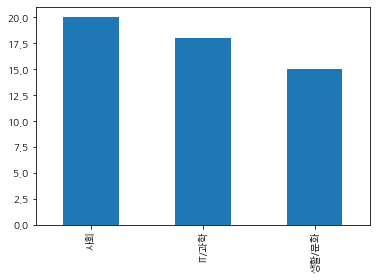

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

df['code'].value_counts().plot(kind = 'bar')

In [30]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학     18
1     사회     20
2  생활/문화     15


* 토큰화

In [31]:
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


* 불용어 제거

In [32]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [33]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [34]:
text_data = preprocessing(df['news'])
print(text_data[0])

파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포


## 머신러닝

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [36]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

In [37]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 39
테스트용 뉴스 기사의 개수 :  14
훈련용 레이블의 개수 :  39
테스트용 레이블의 개수 :  14


In [38]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [39]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [40]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [41]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [42]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['사회']


In [43]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.80      1.00      0.89         4
          사회       0.44      1.00      0.62         4
       생활/문화       0.00      0.00      0.00         6

    accuracy                           0.57        14
   macro avg       0.41      0.67      0.50        14
weighted avg       0.36      0.57      0.43        14



/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 프로젝트